This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

The data includes information on bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017. The information (i.e. columns) includes:
* **hotel**: types of hotel
        Resort Hotel
        City Hotel
* **is_canceled**: if the booking was canceled
        0 - not canceled
        1 - canceled
* **lead_time**: the number of days between the booking date and the arrival date    
* **arrival_date_year**: year of arrival (2015-2017)
* **arrival_date_month**: month of arrival (January-December)
* **arrival_date_week_number**: week number of arrival (1-53)
* **arrival_date_day_of_month**: day of arrival (1-31)
* **stays_in_weekend_nights**: number of weekend nights (Saturday or Sunday) booked 
* **stays_in_week_nights**: number of week nights (Monday to Friday) booked 
* **adults**: number of adults
* **children**: number of children
* **babies**: number of babies
* **meal**: type of meal booked
        Undefined/SC – no meal package
        BB – bed & breakfast
        HB – half board (breakfast and one other meal – usually dinner)
        FB – full board (breakfast, lunch and dinner)
* **country**: country of origin
* **market_segment**: market segment designation, where TA is travel agent and TO is tour operator
* **distribution_channel**: booking distribution channel, where TA is travel agent and TO is tour operator
* **is_repeated_guest**: if the booking name was a repeated guest
        0 - first time guest
        1 - repeated guest
* **previous_cancellations**: number of previous bookings that were canceled by the guest prior to the current booking
* **previous_bookings_not_canceled**: number of previous bookings that were not canceled by the guest prior to the current booking
* **reserved_room_type**: code of the room type reserved
* **assigned_room_type**: code of the room type assigned 
* **booking_changes**: number of changes made to the booking from the booking time to the arrival time
* **deposit_type**: if the guest made a deposit to guarantee the booking
        No Deposit – no deposit was made
        Non Refund – a deposit was made in the value of the total stay cost
        Refundable – a deposit was made with a value under the total cost of stay
* **agent**: ID of the travel agent that made the booking if any
* **company**: ID of the company that made the booking if any
* **days_in_waiting_list**: number of days the booking was in the waiting list before it was confirmed by the guest
* **customer_type**: type of booking
        Contract - the booking has an allotment or other type of contract associated to it
        Group – the booking is associated to a group
        Transient – the booking is not part of a group or contract, and is not associated to other transient booking
        Transient-party – the booking is transient, but is associated to at least other transient booking
* **adr**: average daily rate
* **required_car_parking_spaces**: number of car parking spaces required by the guest
* **total_of_special_requests**: number of special requests (e.g. twin bed/high floor) made by the guest
* **reservation_status**: latest reservation status
        Canceled - booking was canceled by the guest
        Check-Out - guest has checked in but already departed
        No-Show - guest did not check-in and informed the hotel
* **reservation_status_date**: date at which the last *reservation_status* was set

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [2]:
hotel_booking = pd.read_csv('hotel_booking.csv')

In [3]:
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
hotel_booking.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

# Data Cleaning

In [6]:
to_drop = ['company', 'agent']
hotel_booking.drop(to_drop, inplace=True, axis=1)

In [7]:
null_replacements={"country":"Unknown","children":0}

hotel_booking.fillna(null_replacements, inplace=True)

In [8]:
hotel_booking.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [9]:
hotel_booking.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


For more accurate analysis, let's filter out the data where there were no guests (i.e. 0 adults, 0 children and 0 babies) and also change the values of negative daily rate to 0.

In [10]:
no_guests = hotel_booking.loc[(hotel_booking["adults"]==0)&(hotel_booking["children"]==0)&(hotel_booking["babies"]==0)]

hotel_booking.drop(no_guests.index,inplace=True)

In [11]:
hotel_booking["adr"].loc[hotel_booking["adr"]<0]=0

C:\Users\OLADIRAN\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
hotel_booking["adr"].min()

0.0

In [13]:
hotel_booking["adr"].loc[hotel_booking["hotel"]=="City Hotel"].sort_values(ascending=False).head(5)

48515     5400.00
111403     510.00
103912     451.50
103789     375.50
118515     372.33
Name: adr, dtype: float64

An average daily rate of €5400 seems a little too extreme when the next closest rate is €510. I'm assuming it's just a typo for €540

In [14]:
hotel_booking["adr"].loc[hotel_booking["adr"]==5400]=540

For categorical variables:

In [15]:
for col in hotel_booking.select_dtypes(include=["object"]).drop(["country","reservation_status_date"],axis=1):
    print(col)
    print(hotel_booking.select_dtypes(include=["object"]).drop(["country","reservation_status_date"],axis=1)[col].value_counts())
    print("")

hotel
City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

arrival_date_month
August       13861
July         12644
May          11780
October      11147
April        11078
June         10929
September    10500
March         9768
February      8052
November      6771
December      6759
January       5921
Name: arrival_date_month, dtype: int64

meal
BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64

market_segment
Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

distribution_channel
TA/TO        97750
Direct       14611
Corporate     6651
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

reserved_room_type
A    85873
D    19179
E     6519
F     2894
G     2092
B     1115
C      931
H      601
L        6

The undefined values in the *meal* column should be lumped into the SC category (meaning no meal package)

In [16]:
hotel_booking["meal"].replace("Undefined","SC",inplace=True)

In [17]:
hotel_booking['meal'].value_counts()

BB    92236
HB    14458
SC    11718
FB      798
Name: meal, dtype: int64

# Data Visualization

## 1. Which hotels are guests booking?

In [18]:
hotel = hotel_booking['hotel'].value_counts()

Text(0.5, 0.93, 'Which hotels are guests booking?')

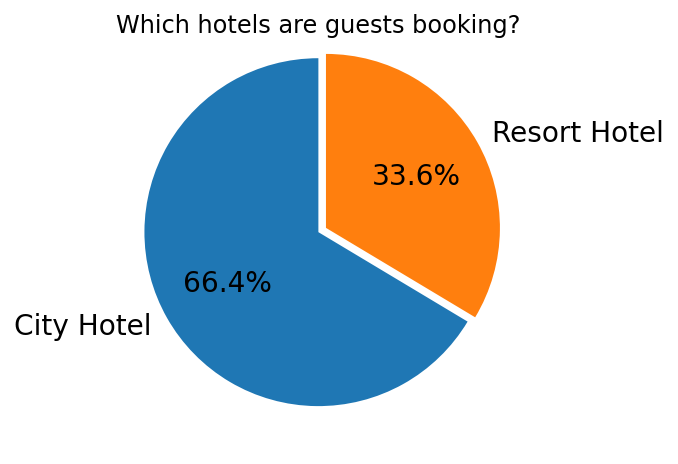

In [19]:
hotel.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=[0,0.05], textprops={"fontsize":14})
plt.ylabel('')
plt.title("Which hotels are guests booking?",y=0.93)

66.4% of the guests booked city hotels, but these include bookings that were both canceled and not canceled which leads to the next graph:

## 2. Number of bookings that were canceled at each hotel

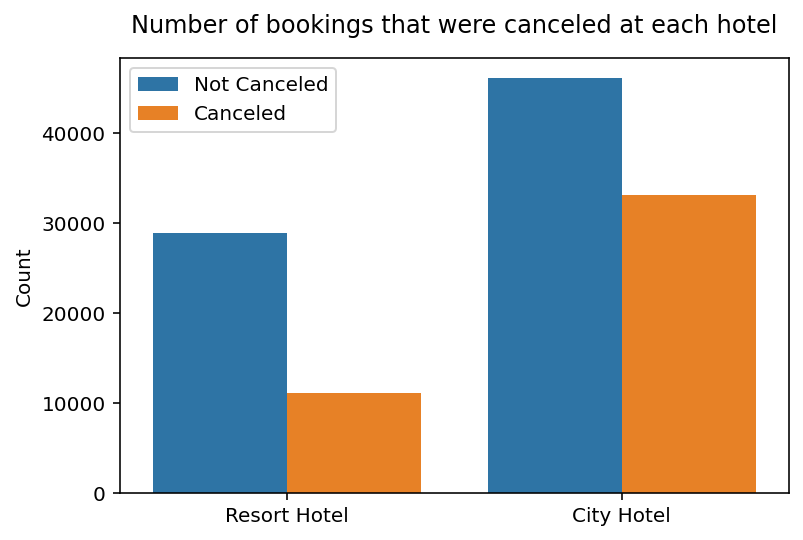

In [20]:
ax=sns.countplot(x=hotel_booking["hotel"],hue=hotel_booking["is_canceled"],saturation=0.8)
plt.title("Number of bookings that were canceled at each hotel",y=1.03)
plt.xlabel("")
plt.ylabel("Count")
plt.legend(("Not Canceled","Canceled"))

Almost 75% of the bookings at the City Hotel were canceled, while only less than 50% were canceled at the Resort Hotel. Maybe guests are more prone to cancelling their booking if they don't have to pay a deposit.

## 3. Number of deposit types from cancelled bookings

Text(0.5, 1.0, 'Number of deposit types from cancelled bookings')

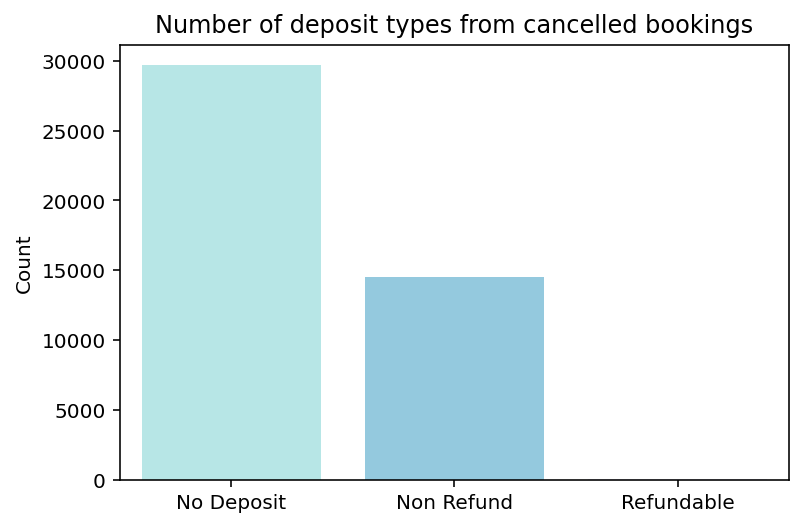

In [21]:
cancelled = hotel_booking["deposit_type"].loc[hotel_booking["is_canceled"]==1]
palette_color = {"No Deposit":"paleturquoise","Non Refund":"skyblue","Refundable":"lavender"}
                                      
ax=sns.countplot(x=cancelled, palette=palette_color)
plt.xlabel("")
plt.ylabel("Count")
plt.title("Number of deposit types from cancelled bookings")

In [22]:
hotel_booking["is_canceled"].value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

From the analysis above, almost 67% of the bookings were cancelled since no deposits were made by the guests and they were definitely not going to lose any money. Also, about 33% of the guests still cancelled despite the non-refund policy probably because they have some important reasons.

## 4. Number of first time and repeated guests who canceled

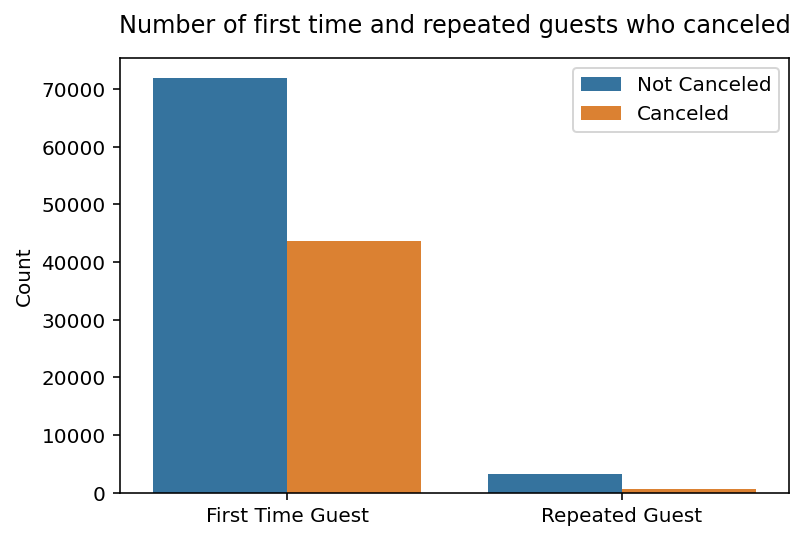

In [23]:
sns.countplot(x=hotel_booking["is_repeated_guest"], hue=hotel_booking["is_canceled"], saturation=0.7)
plt.title("Number of first time and repeated guests who canceled",y=1.03)
plt.xlabel("")
plt.xticks((0,1),("First Time Guest","Repeated Guest"))
plt.ylabel("Count")
plt.legend(("Not Canceled","Canceled"))

Most of the guests that cancelled are first timers. They probably have some many others options to check out.

## 5. Number of days the cancelled booking was in the waiting list before it was confirmed

(0.5, 9.5)

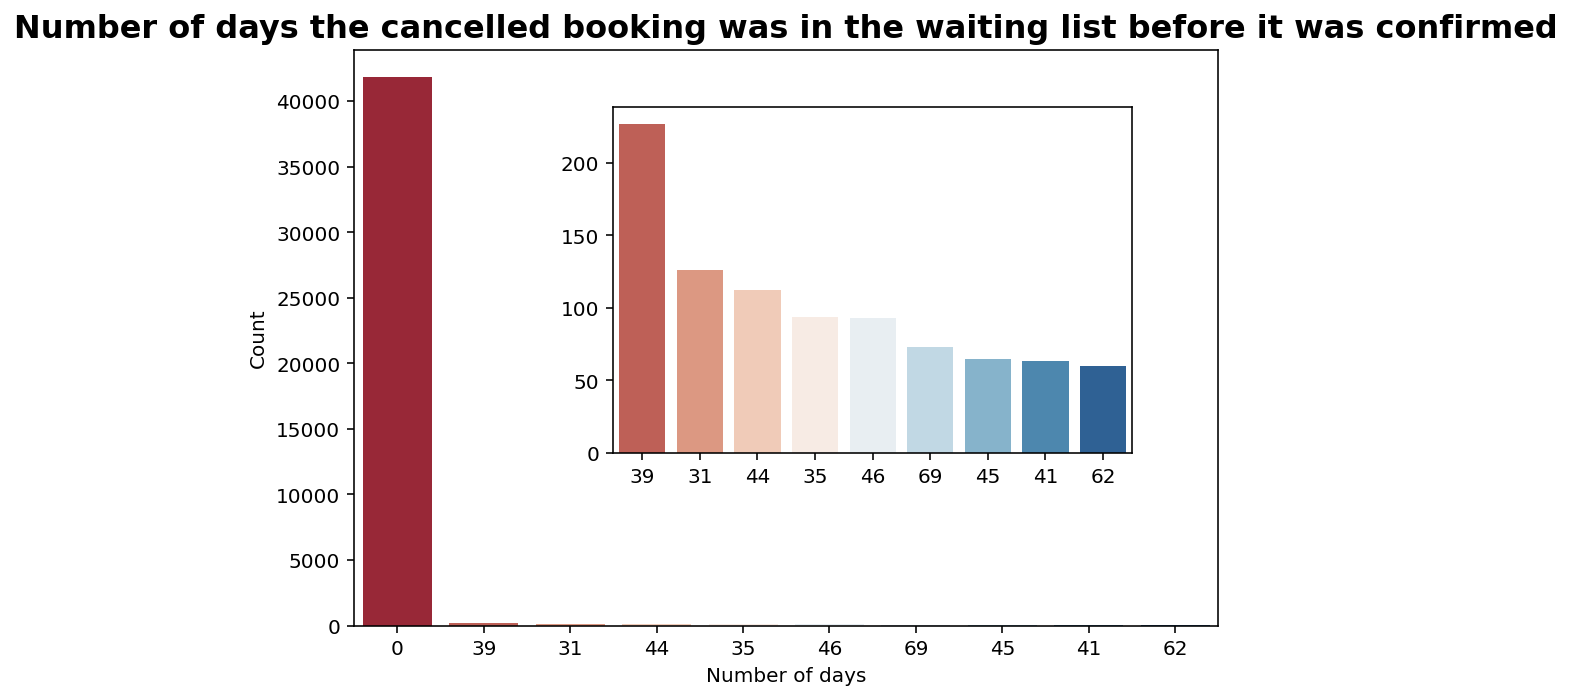

In [24]:
waitinglist=pd.DataFrame({"Days":hotel_booking["days_in_waiting_list"].loc[(hotel_booking["is_canceled"]==1)].value_counts().head(10).index,"Count":hotel_booking["days_in_waiting_list"].loc[(hotel_booking["is_canceled"]==1)].value_counts().head(10).values})

waitinglistorder=[0,39,31,44,35,46,69,45,41,62]

fig=plt.figure()
ax1=fig.add_axes([0,0,1,1])
ax2=fig.add_axes([0.3,0.3,0.6,0.6])
sns.barplot(x=waitinglist["Days"],y=waitinglist["Count"],order=waitinglistorder,palette="RdBu",ax=ax1)
sns.barplot(x=waitinglist["Days"].drop([0]),y=waitinglist["Count"].drop([0]),order=waitinglistorder,palette="RdBu",ax=ax2)
ax1.set_title("Number of days the cancelled booking was in the waiting list before it was confirmed",fontweight="bold",fontsize=16)
ax1.set_xlabel("Number of days")
ax2.set_xlabel("")
ax1.set_ylabel("Count")
ax2.set_ylabel("")
ax2.set_xlim([0.5,9.5])

Over 40000 of the guests confirmed their (cancelled) booking within the day. Others seems to ponder over their booking for a little longer, between one to two months, before confirming it.

## 6. Country of origin of top 20 guests

In [25]:
country=pd.DataFrame({"Country":hotel_booking["country"].value_counts().index.to_list(),"Number":hotel_booking["country"].value_counts().to_list()})

country

,Country,Number
0,PRT,48483
1,GBR,12120
2,FRA,10401
3,ESP,8560
4,DEU,7285
...,...,...
173,DJI,1
174,BWA,1
175,HND,1
176,VGB,1


Text(0.5, 1.0, 'Country of Origin of top 20 guests')

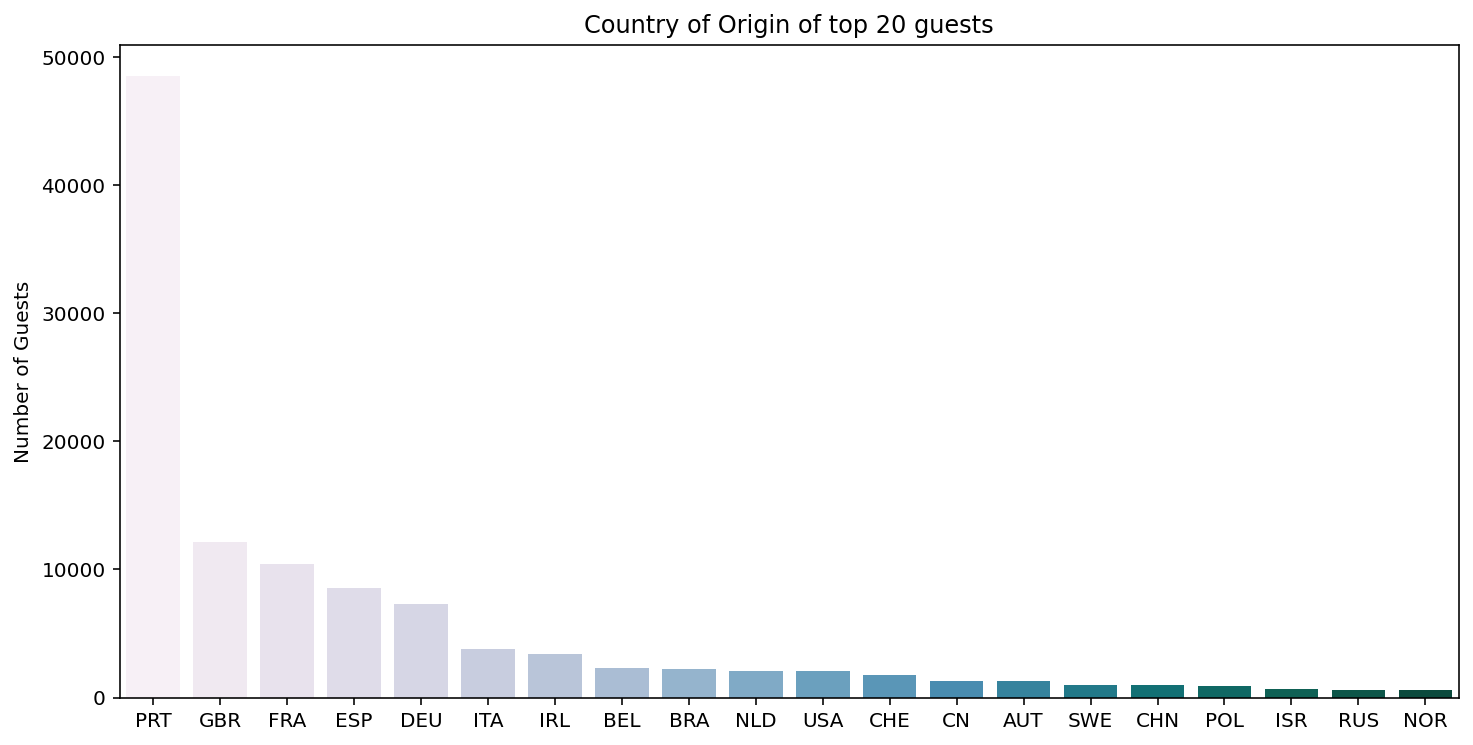

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x=country["Country"].head(20),y=country["Number"].head(20),palette='PuBuGn')
plt.xlabel("")
plt.ylabel("Number of Guests")
plt.title("Country of Origin of top 20 guests")

This plot shows that most of the guests are local tourists since the hotels are based in Portugal

## 7. Types of Guests

Text(0.5, 1.0, 'Types of guests')

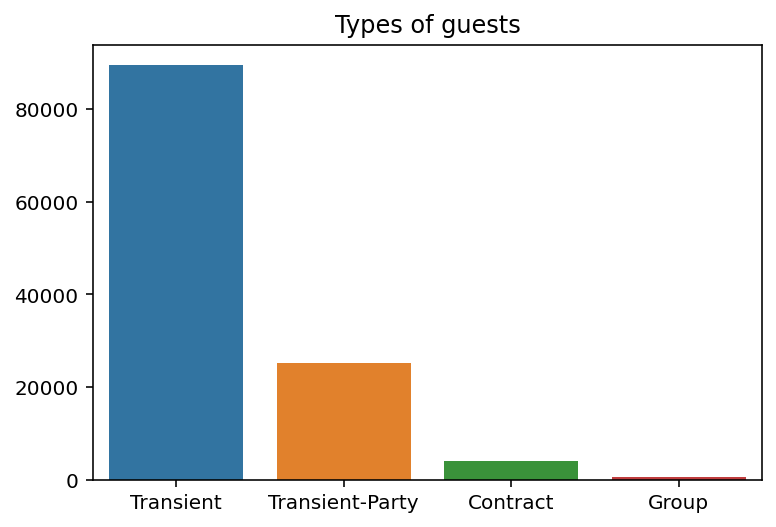

In [27]:
sns.barplot(x= hotel_booking["customer_type"].value_counts().index,
           y= hotel_booking["customer_type"].value_counts().values)
plt.title("Types of guests")


##### About 75.1% of the guests are transient (i.e not part of a party) and 21% of them areTransient-Party. Contract and Group bookings make up the remaining 3.9% with 4072 and 574 respectively.

## 8. The month with the highest frequency of guests arrival

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'August'),
  Text(1, 0, 'July'),
  Text(2, 0, 'May'),
  Text(3, 0, 'October'),
  Text(4, 0, 'April'),
  Text(5, 0, 'June'),
  Text(6, 0, 'September'),
  Text(7, 0, 'March'),
  Text(8, 0, 'February'),
  Text(9, 0, 'November'),
  Text(10, 0, 'December'),
  Text(11, 0, 'January')])

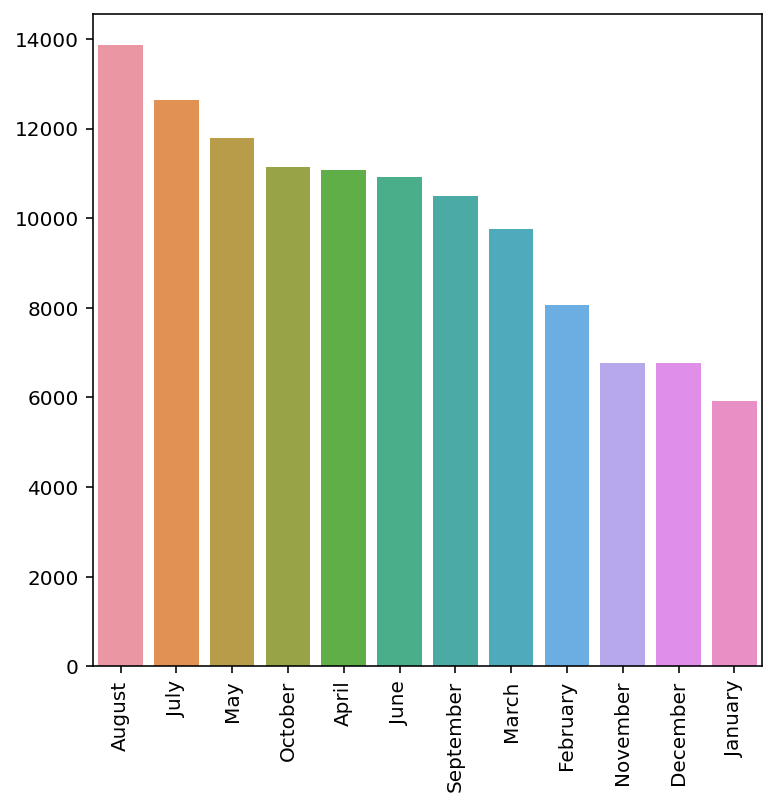

In [28]:
fig, ax = plt.subplots(figsize=(6,6))

sns.barplot(x= hotel_booking['arrival_date_month'].value_counts().index,
           y= hotel_booking['arrival_date_month'].value_counts().values)

plt.xticks(rotation=90)

From the plot above, we see that more arrival of guests were recorded in August probably because its Summer.